In [2]:
# Importing the Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#reading data
population = pd.read_csv('diabetes.csv')
population.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
#Setting seed and observations

np.random.seed(40)
Db_sample = population.sample(n=25)

#Calculating  glucose mean and maximum for population and sample

Glu_sample_stats = Db_sample['Glucose'].agg(['mean', 'max'])
Glu_sample_mean = Glu_sample_stats['mean']
Glu_sample_highest = Glu_sample_stats['max']

# Using agg function for population
Glu_population_stats = population['Glucose'].agg(['mean', 'max'])
Glu_population_mean = Glu_population_stats['mean']
Glu_population_highest = Glu_population_stats['max']


In [7]:
print("Mean Glucose Level (Sample):", Glu_sample_mean)
print("Highest Glucose Level (Sample):", Glu_sample_highest)
print("\nMean Glucose Level (Population):", Glu_population_mean)
print("Highest Glucose Level (Population):", Glu_population_highest)


Mean Glucose Level (Sample): 121.2
Highest Glucose Level (Sample): 184.0

Mean Glucose Level (Population): 120.89453125
Highest Glucose Level (Population): 199.0


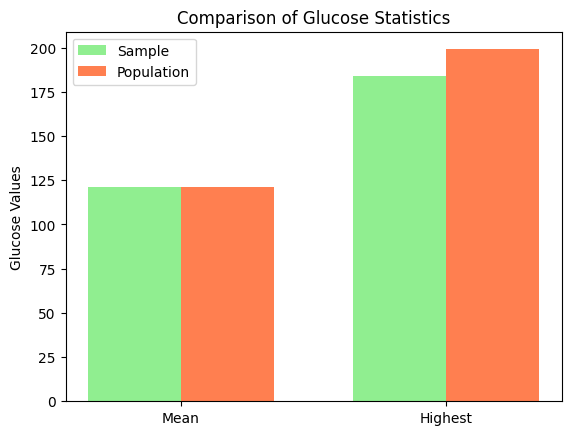

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the bar chart
labels = ['Mean', 'Highest']
sample_values = [Glu_sample_mean, Glu_sample_highest]
population_values = [Glu_population_mean, Glu_population_highest]

# Number of bars
x = np.arange(len(labels))

# Width of the bars
width = 0.35

# Creating the bar chart
fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, sample_values, width, label='Sample', color='lightgreen')
bars2 = ax.bar(x + width/2, population_values, width, label='Population', color='coral')

# Adding labels, title, and custom x-axis tick labels
ax.set_ylabel('Glucose Values')
ax.set_title('Comparison of Glucose Statistics')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Display the chart
plt.show()


In [11]:
# Calculating the 98th percentile for BMI in the sample
sam_bmi_98th_percentile = np.percentile(Db_sample['BMI'], 98)

# Calculating the 98th percentile for BMI in the population
pop_bmi_98th_percentile = np.percentile(population['BMI'], 98)

# Displaying the percentiles
print("BMI of Sample 98th Percentile :", sam_bmi_98th_percentile)
print("BMI of Population 98th Percentile :", pop_bmi_98th_percentile)


BMI of Sample 98th Percentile : 47.151999999999994
BMI of Population 98th Percentile : 47.52599999999996


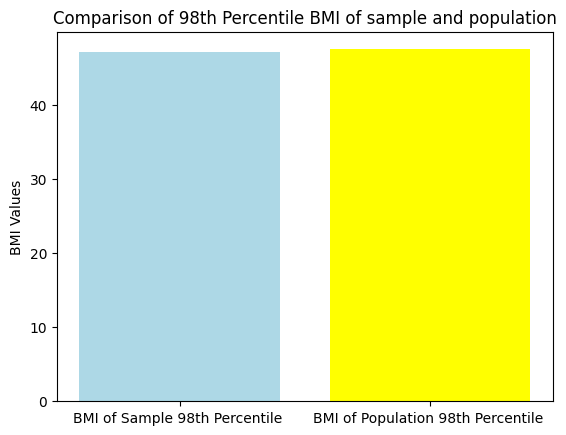

In [15]:
# Creating a bar chart for comparison
labels_per = ['BMI of Sample 98th Percentile ', 'BMI of Population 98th Percentile ']
values_per = [sam_bmi_98th_percentile, pop_bmi_98th_percentile]

plt.bar(labels_per, values_per, color=['lightblue', 'yellow'])
plt.title('Comparison of 98th Percentile BMI of sample and population')
plt.ylabel('BMI Values')
plt.show()

In [19]:
import numpy as np
import pandas as pd

# Initializing variables
sample_num = 1000
sample_size = len(Db_sample)
mean_boot = np.zeros(sample_num)
stddev_boot = np.zeros(sample_num)
perc_boot = np.zeros(sample_num)

# Performing bootstrap sampling
for i in range(sample_num):
    # Create a bootstrap sample
    boot_sample = population['BloodPressure'].sample(n=sample_size, replace=True)

    # Determining the bootstrap sample's mean, standard deviation, and 92nd percentile
    mean_boot[i] = boot_sample.mean()
    stddev_boot[i] = boot_sample.std()
    perc_boot[i] = boot_sample.quantile(0.92)

# Creating a DataFrame to store the results
boot_results = pd.DataFrame({
    'Mean': mean_boot,
    'Standard Deviation': stddev_boot,
    '92nd Percentile': perc_boot
})

# Displaying the descriptive statistics of the bootstrap results
print(boot_results.describe())

# Computing BloodPressure population statistics
mean_pop_bp = population['BloodPressure'].mean()
stddev_pop_bp = population['BloodPressure'].std()
perc_92_pop_bp = population['BloodPressure'].quantile(0.92)

# Displaying the demographic data
print("Mean Blood Pressure (Population):", mean_pop_bp)
print("Standard Deviation of Blood Pressure (Population):", stddev_pop_bp)
print("92nd Percentile of Blood Pressure (Population):", perc_92_pop_bp)




              Mean  Standard Deviation  92nd Percentile
count  1000.000000         1000.000000       1000.00000
mean     69.100920           18.593296         87.35832
std       3.842868            5.381130          4.30791
min      55.520000            8.020806         74.48000
25%      66.590000           13.979687         84.32000
50%      69.360000           18.714520         88.00000
75%      71.800000           22.533752         90.00000
max      79.920000           33.440096        110.32000
Mean Blood Pressure (Population): 69.10546875
Standard Deviation of Blood Pressure (Population): 19.355807170644777
92nd Percentile of Blood Pressure (Population): 88.0


In [20]:
# Determining the bootstrap statistics' mean, standard deviation, and 92nd percentile
boot_mean_mean = mean_boot.mean()
boot_mean_stddev = stddev_boot.mean()
boot_mean_perc_92 = perc_boot.mean()

# Presenting the statistics from the bootstrap
print("\nBootstrap Mean of Blood Pressure:", boot_mean_mean)
print("Bootstrap Standard Deviation of Blood Pressure:", boot_mean_stddev)
print("Bootstrap 92nd Percentile of Blood Pressure:", boot_mean_perc_92)



Bootstrap Mean of Blood Pressure: 69.10092
Bootstrap Standard Deviation of Blood Pressure: 18.593296338523363
Bootstrap 92nd Percentile of Blood Pressure: 87.35832


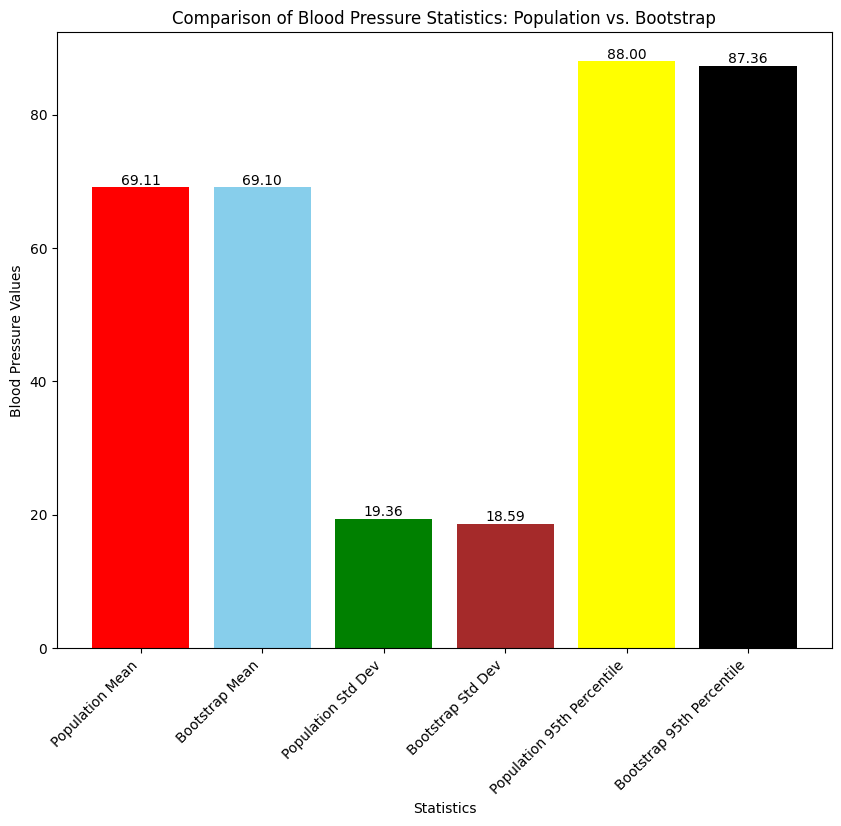

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the bar chart
labels = ['Population Mean', 'Bootstrap Mean', 'Population Std Dev', 'Bootstrap Std Dev', 'Population 95th Percentile', 'Bootstrap 95th Percentile']
values = [mean_pop_bp, boot_mean_mean, stddev_pop_bp, boot_mean_stddev, perc_92_pop_bp, boot_mean_perc_92]

# Colors for each bar
colors = ['red', 'skyblue', 'green', 'brown', 'yellow', 'black']

# Creating the bar chart
plt.figure(figsize=(10, 8))
bars = plt.bar(labels, values, color=colors)

# Adding labels, title, and customization
plt.xlabel('Statistics')
plt.ylabel('Blood Pressure Values')
plt.title('Comparison of Blood Pressure Statistics: Population vs. Bootstrap')

# Adding value labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

# Display the plot
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.show()
